In [1]:
from pyawd import VectorAcousticWaveDataset2D
from tqdm import tqdm
import numpy as np

In [3]:
def generate_interrogators_dataset(X):
    res = []
    for i in tqdm(range(X.size)):
        res.append(np.array([list(X[i][1].values())]))
    return np.array(res)

In [4]:
base_train = "train_big"
nx = 128
N = (nx**2)//4
interrogators = [(nx//4, 0), (-nx//4, 0)]
train = VectorAcousticWaveDataset2D(N, nx=nx, interrogators=interrogators, velocity_model="Marmousi")
train.max_velocities = np.ones(N)*1000
train.save(base_train)

In [5]:
X = generate_interrogators_dataset(train)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4096/4096 [1:16:10<00:00,  1.12s/it]


In [6]:
np.save(base_train+"_interrogators_data.npy", X)
Y = np.array([train.get_epicenter(i)/(train.nx/2) for i in range(train.size)])
np.save(base_train+"_epicenters.npy", Y)

In [7]:
base_test = "test_big"
N = N//8
test = VectorAcousticWaveDataset2D(N, nx=nx, interrogators=interrogators, velocity_model="Marmousi")
test.max_velocities = np.ones(N)*1000
test.save(base_test)

In [8]:
X_test = generate_interrogators_dataset(test)
np.save(base_test+"_interrogators_data.npy", X_test)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [09:31<00:00,  1.12s/it]


In [9]:
Y_test = np.array([test.get_epicenter(i)/(test.nx/2) for i in range(test.size)])
np.save(base_test+"_epicenters.npy", Y_test)

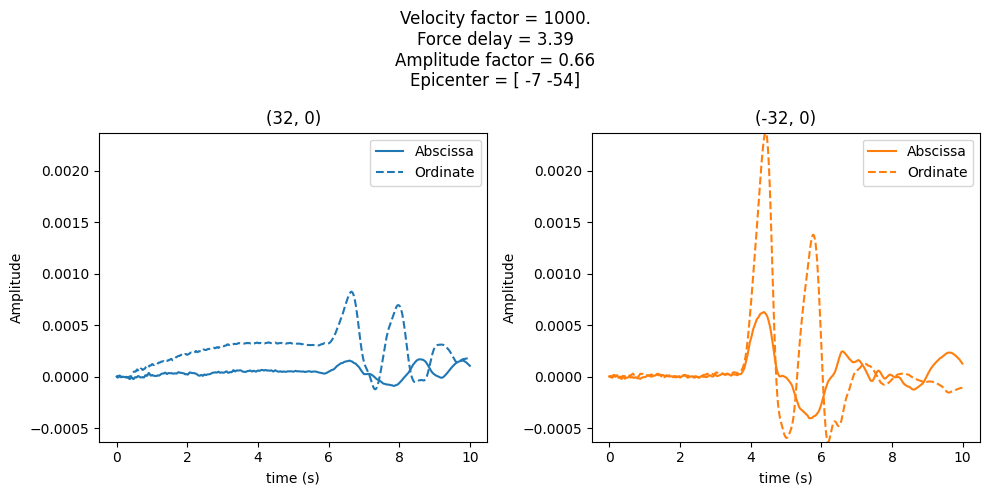

In [11]:
train.plot_interrogators_response(0)

In [ ]:
train.plot_item(0)